# Assignment 10: Regression

In this assignment you will predict bike sharing counts based on a number of features. 

Use the data in the file `data/bike-sharing-daily.csv`, which was downloaded from the [UCI repository](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).

Use the first 600 samples in this data set to train a regression model of your choice to predict the counts of shared bikes stored in the column `cnt`. Feel free to use all columns except for the columns `casual`, `registered` or the target column itself (`cnt`).

After fitting the model, plot the true values for training and test data and plot the predicted values on top, the code in the last cell of this notebook shows how to do the plotting. 

In [1]:
import pandas as pd
df = pd.read_csv('data/bike-sharing-daily.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [31]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

df.index = pd.to_datetime(df['dteday'])
df_train = df[:600]
df_test = df[600:]

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['temp','atemp','hum','windspeed']
categorical_features = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
target = 'cnt'
X_train = df_train[numeric_features + categorical_features]
y_train = df_train[target]

X_test = df_test[numeric_features + categorical_features]
y_test = df_test[target]

# YOUR CODE HERE
# use a sklearn regression model assign it to a variable 
# reg = ...

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_features', StandardScaler(), numeric_features),
        ('categorical_features', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Linear Regression model
reg = Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())]).fit(X_train, y_train)

print("model score: %.3f" % reg.score(X_test, y_test))

model score: 0.657


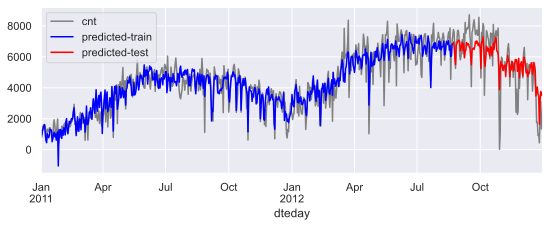

In [32]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [9, 3]
import seaborn; seaborn.set()
ax = df[target].plot(color='grey')

y_predicted_train = pd.Series(index=y_train.index,
                              data=reg.predict(X_train),
                              name='predicted-train')
y_predicted_train.plot(ax=ax,color='blue')

y_predicted_test = pd.Series(index=y_test.index,
                             data=reg.predict(X_test),
                             name='predicted-test')
y_predicted_test.plot(ax=ax,color='red');

plt.legend();